# Gradient Descent

Follow through the notebook to see pictoral representations of gradient descent, with changing values of alpha, as well as an analysis of the error rate over various iterations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import data
df_i = pd.read_csv('score.csv', sep=',')
x = df_i.loc[:,"Hours"]
y = df_i.loc[:,"Scores"]

## Basic Gradient Descent

Representation of how the algorithm starts at a specific location and iteratively moves towards the minimum.

In [2]:
#set the rate of descent
def f(w):
  return (w-2) **2 +1

#the derivative of the rate of descent
def df(w):
  return 2*(w-2)

#function that calculates gradient descent
def gradient_descent(gradient, start, learn_rate, n_iter):
  vector = start
  gradients = [start]
  gradients_f = [f(start)]
  for _ in range(n_iter):
    diff = -learn_rate * gradient(vector)
    vector += diff
    gradients.append(vector)
    gradients_f.append(f(vector))
  return gradients, gradients_f

In [3]:
#call the function with these specified values
descent, descent_f = gradient_descent(df, start = 5.0, learn_rate = 0.9, n_iter = 50)

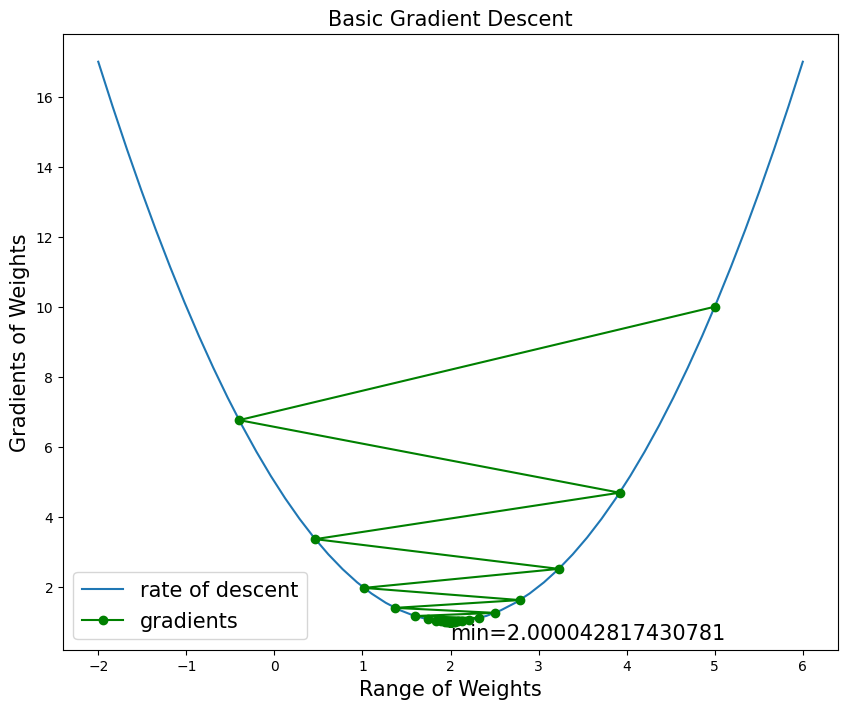

In [4]:
#range of data
domain = np.linspace(-2, 6, 50)

#plot the figure
plt.figure(figsize = (10,8))
plt.plot(domain, f(domain), label = "rate of descent")
plt.plot(descent, descent_f, color = "green", marker = "o", label = "gradients")
plt.legend(fontsize = 15)
plt.text(descent[-1], descent_f[-1] - 0.5, f"min={descent[-1]}", fontsize=15)
plt.xlabel("Range of Weights", fontsize = 15)
plt.ylabel("Gradients of Weights", fontsize = 15)
plt.title("Basic Gradient Descent", fontsize = 15)
plt.show()

### Various Values of Alpha in Basic Gradient Descent

We can see the change of the gradient as values of alpha vary. As alpha becomes larger, the steps on either side of the starting place (x=5) becomes more drastic and is less likely to find the minimum. The following example shows the behavior of gradient descent as values of alpha vary.

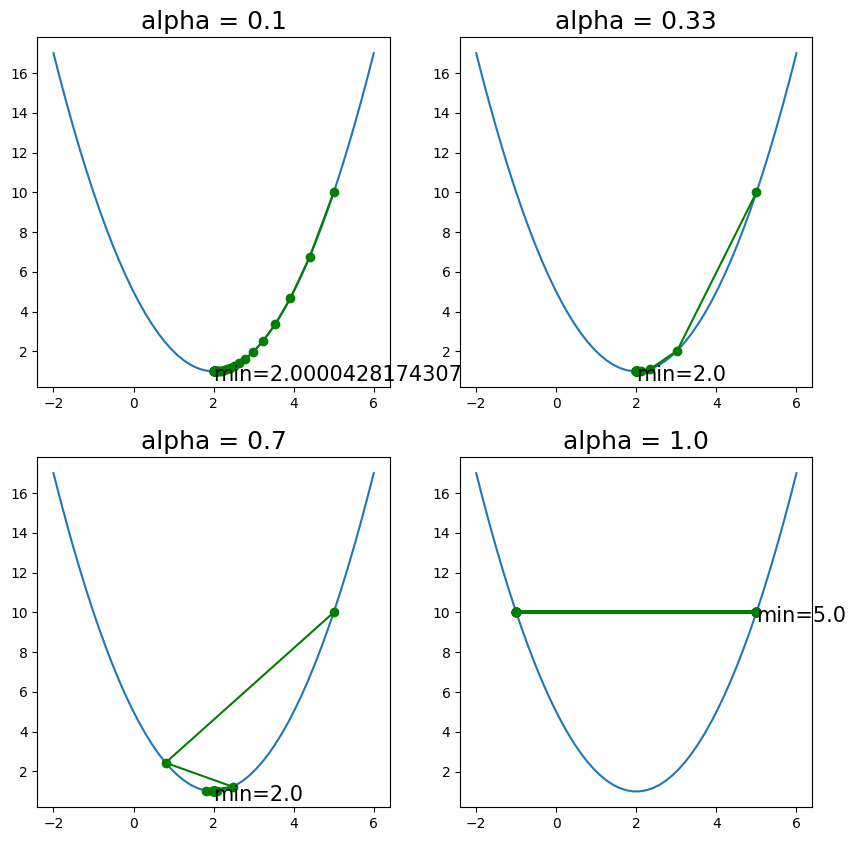

In [5]:
alphas = [0.1, 0.33, 0.7, 1.0]

fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    descent, descent_f = gradient_descent(df, start = 5.0, learn_rate = alpha, n_iter = 50)
    ax.plot(domain, f(domain))
    ax.plot(descent, descent_f, color = "green", marker = "o")
    ax.text(descent[-1], descent_f[-1] - 0.5, f"min={descent[-1]}", fontsize=15)
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

Compared to the first example, in which alpha = 0.9, we can see how a smaller alpha value searches for the minima in smaller increments, whereas the larger values have a quicker descent. In some cases, like when alpha = 1, the minima is never found since the step size is too large.

## Gradient Descent with Data

Implementing the Student Scores dataframe, we can see the gradual decline of the values when calculating Linear Regression.

In [6]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=50):
        self.learning_rate, self.iterations = learning_rate, iterations

    def grad_desc(self, x, y): #gradient descent function, saving the gradients specifically
        b = 0; b_list = []; b_f = []
        m = 5; m_list = []
        n = x.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*x + b) / n
            m_gradient = -2 * np.sum(x*(y - (m*x + b))) / n
            b_list.append(b_gradient)
            b_f.append(f(b_gradient))
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b, self.grad, self.grad_f = m, b, b_list, b_f

    def predict(self, x):
        return self.m*x + self.b

In [7]:
#call the class
clf = GradientDescentLinearRegression()

#call the gradient descent function
clf.grad_desc(x, y)

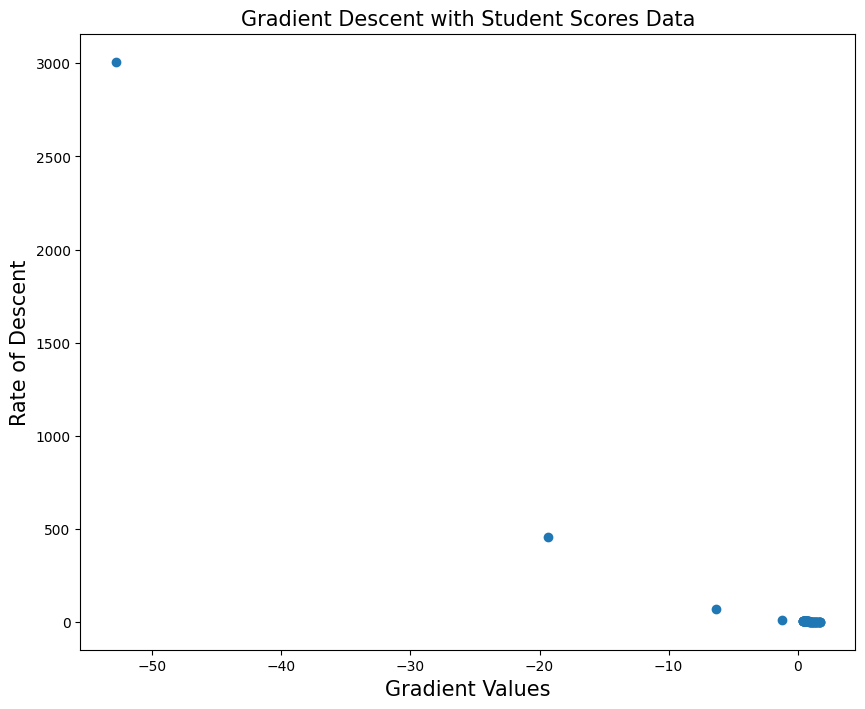

In [8]:
#plot the figure
plt.figure(figsize = (10,8))
plt.scatter(clf.grad, clf.grad_f)
plt.xlabel("Gradient Values", fontsize = 15)
plt.ylabel("Rate of Descent", fontsize = 15)
plt.title("Gradient Descent with Student Scores Data", fontsize = 15)
plt.show()

This figure is a bit difficult to understand, so we zoom into the bulk of the values by discarding the first 3 outliers:

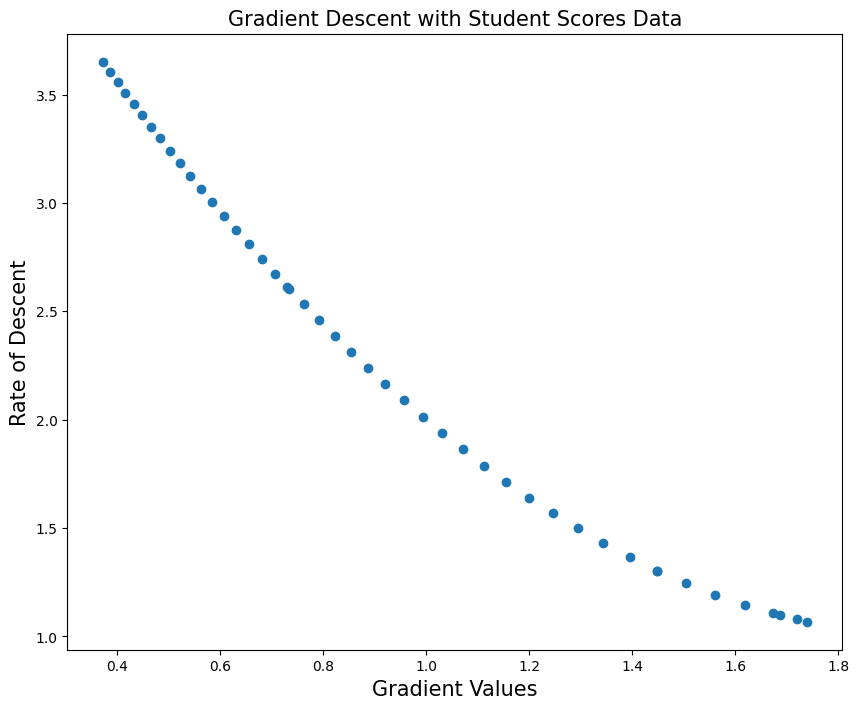

In [9]:
#plot the figure
plt.figure(figsize = (10,8))
plt.scatter(clf.grad[4:], clf.grad_f[4:])
plt.xlabel("Gradient Values", fontsize = 15)
plt.ylabel("Rate of Descent", fontsize = 15)
plt.title("Gradient Descent with Student Scores Data", fontsize = 15)
plt.show()

We can see the clear approach to the minimum value of the weights used for the gradient descent. Of course, if the value of alpha, aka the learning rate, are increased, then the behavior will look a bit different than this graphs.

## Stochastic Gradient Descent (SGD)

By choosing the observations randomly, the gradient is calculated on a portion of the values, rather than all of them.

In [10]:
def SGD(x,y,iterations = 50, theta=2, alpha=0.01):
  theta_vals = []; f_theta = []

  for i in range(iterations):
      rand_int = np.random.randint(0,len(x), 1) #specify a list of random integers

      X_i = np.take(x, rand_int)
      y_i = np.take(y, rand_int)

      prediction = np.dot(X_i,theta)
      summ = np.sum(X_i * ((y_i - prediction)))
      theta = theta -((1/len(y))*alpha*(summ)) #equation as seen on explination page

      theta_vals.append(theta) #append both the gradients and the rate of descent
      f_theta.append(f(theta))
  return theta_vals, f_theta

In [11]:
#import data again so that it is not influenced by previous alterations
df_i = pd.read_csv('score.csv', sep=',')
x = df_i.loc[:,"Hours"]
y = df_i.loc[:,"Scores"]

#call the gradient descent function
grad, f_grad = SGD(x,y)

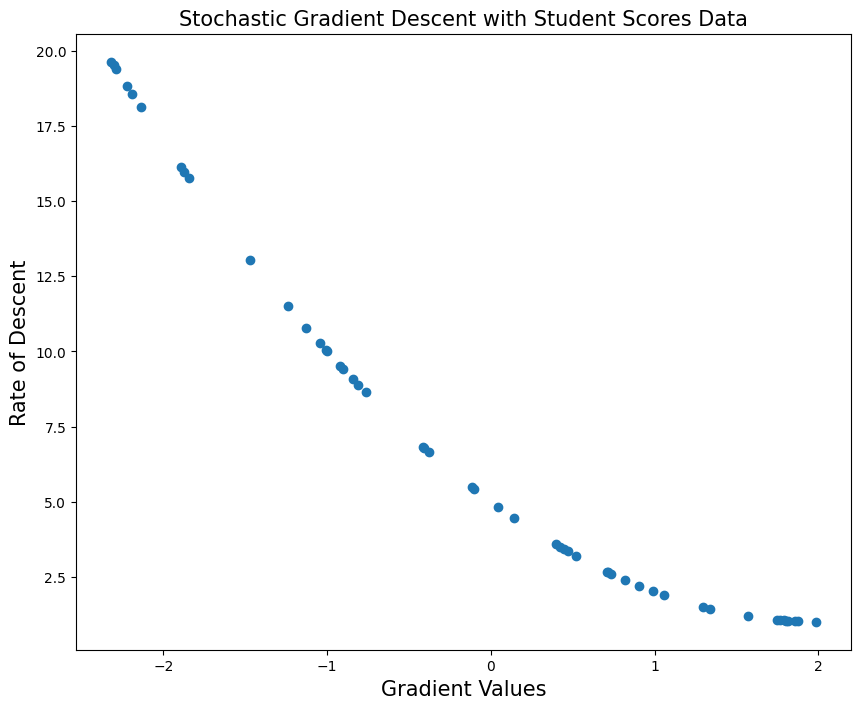

In [12]:
#plot the figure
plt.figure(figsize = (10,8))
plt.scatter(grad, f_grad)
plt.xlabel("Gradient Values", fontsize = 15)
plt.ylabel("Rate of Descent", fontsize = 15)
plt.title("Stochastic Gradient Descent with Student Scores Data", fontsize = 15)
plt.show()

We see that the rate of descent is similar to previous examples, but the gradient values are not as evenly spaced as before.

## Batch Gradient Descent

The batch method is used for training neural networks and updates the trained variable iteratively.

In [13]:
def BGD(x,y,iterations = 50, theta=2, alpha=0.01, batch_size = 10):
  theta_vals = []; f_theta = []
  batches = len(y)/batch_size #specify the batch size for training

  for i in range(iterations):

      X_i = x[i:i+batch_size]
      y_i = y[i:i+batch_size]

      prediction = np.dot(X_i,theta)
      summ = np.sum(X_i * ((y_i - prediction)))

      theta = theta -((1/len(y))*alpha*(summ))

      theta_vals.append(theta)
      f_theta.append(f(theta))
  return theta_vals, f_theta

In [14]:
#import the data again so that it is not influenced by previous alterations
df_i = pd.read_csv('score.csv', sep=',')
x = df_i.loc[:,"Hours"]
y = df_i.loc[:,"Scores"]

#call the gradient descent function
bgrad, f_bgrad = BGD(x,y)

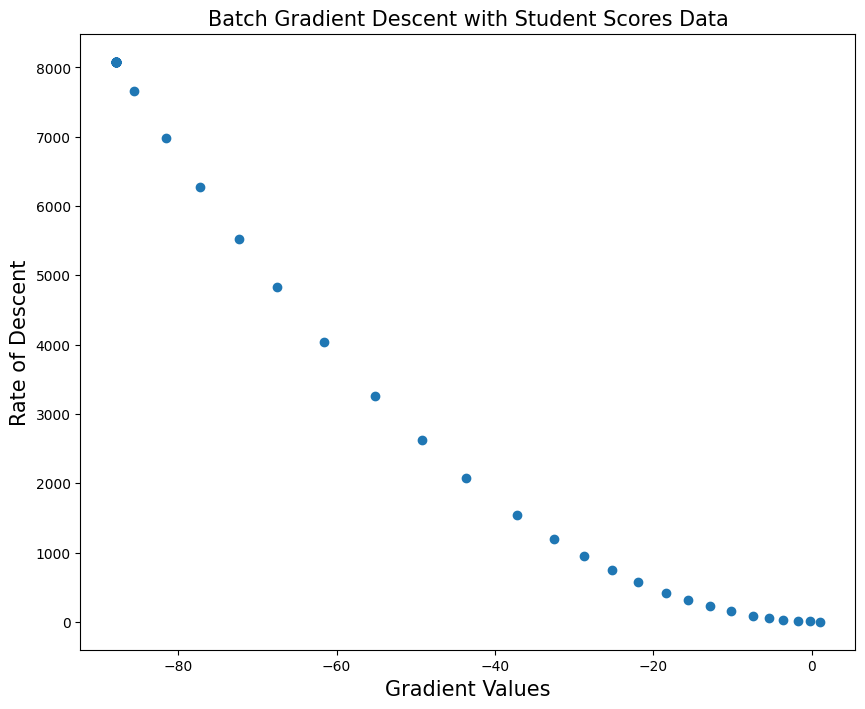

In [15]:
#plot the figure
plt.figure(figsize = (10,8))
plt.scatter(bgrad, f_bgrad)
plt.xlabel("Gradient Values", fontsize = 15)
plt.ylabel("Rate of Descent", fontsize = 15)
plt.title("Batch Gradient Descent with Student Scores Data", fontsize = 15)
plt.show()

The rate of descent is higher than any of our other graphs since we conduct so many batches. According to the gradient values, reaching the minima becomes more precise as seen in the spacing between points.